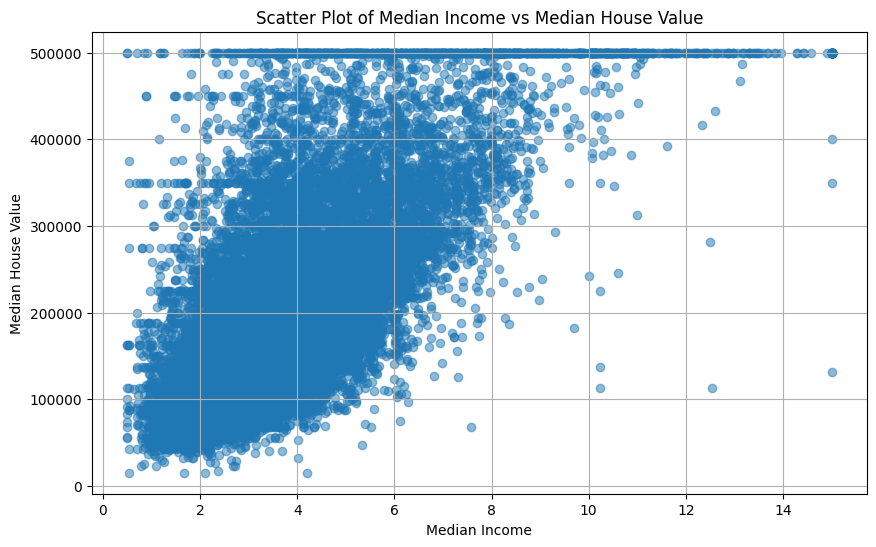

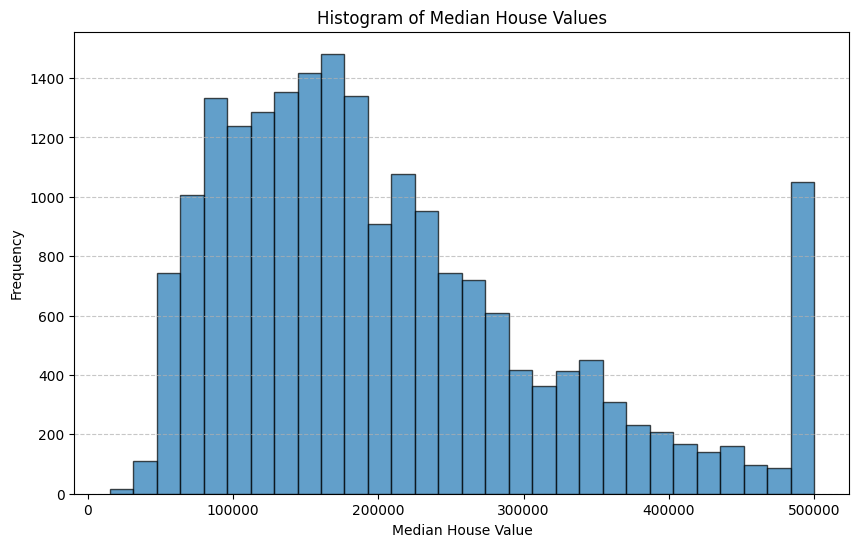

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load data
data = pd.read_csv('housing 2.csv')

# Handle Missing Values
# Drop rows with missing values in key columns
data = data.dropna(subset=['total_bedrooms', 'total_rooms', 'median_income', 'median_house_value'])

# Remove Duplicates
data = data.drop_duplicates()

# Double check numerical format for selected columns
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                   'population', 'households', 'median_income', 'median_house_value']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')



# Visualization: Scatter plot to show the relationship between median_income and median_house_value
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5)
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('Median Income') # Median income is measured in tens of thousands of dollars
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

# Visualization: Histogram to show the distribution of median house values
plt.figure(figsize=(10, 6))
plt.hist(data['median_house_value'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency') # Number of Houses
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Mean Squared Error: 4921881237.63
R^2 Score: 0.64


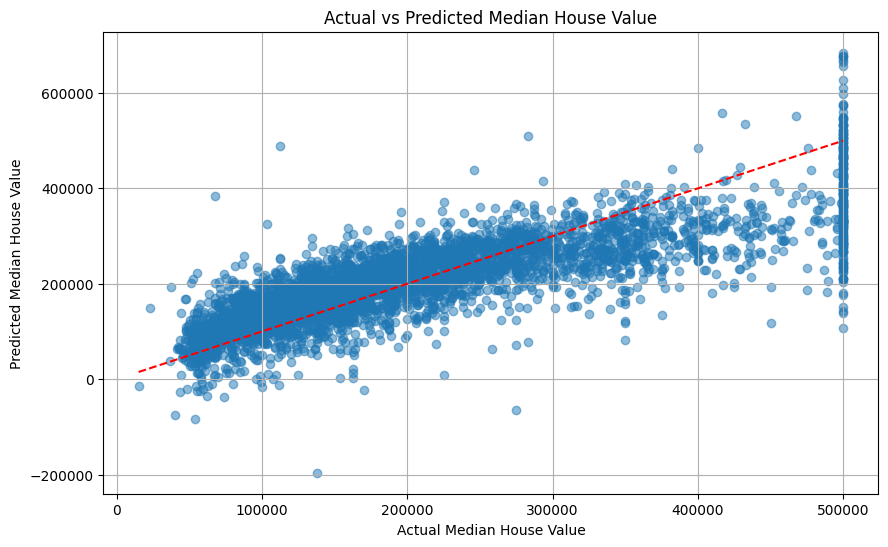

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select relevant features and target
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income']
target = 'median_house_value'

# Handle missing values in the dataset
data = data.dropna(subset=features + [target])

# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.grid(True)
plt.show()